# (1) 데이터 가져오기

 * sklearn.datasets의 load_diabetes에서 데이터를 가져와주세요.
 * diabetes의 data를 df_X에, target을 df_y에 저장해주세요.

In [2]:
# 라이브러리 불러오기
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
# matplib 한글폰트
!pip install koreanize-matplotlib
import koreanize_matplotlib

In [4]:
from sklearn.datasets import load_diabetes

diabetes=load_diabetes()

In [5]:
# numpy array 값들
df_X = diabetes.data
df_y = diabetes.target
df_X

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286377, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04687948,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452837, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00421986,  0.00306441]])

In [6]:
diabetes

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990842, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06832974, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286377, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04687948,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452837, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00421986,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

# (2) 모델에 입력할 데이터 X 준비하기
 * df_X에 있는 값들을 numpy array로 변환해서 저장해주세요.
 
 (이미 numpy array같다.) ndarray가 array로 안바뀌는걸 봐서는 ndarray가 array같다.
 변수 X를 저장하는거였구나를 깨달았다.

In [7]:
type(df_X)

numpy.ndarray

In [8]:
X = np.array(df_X)

In [9]:
type(X)

numpy.ndarray

# (3) 모델에 예측할 데이터 y 준비하기
 * df_y에 있는 값들을 numpy array로 변환해서 저장해주세요.
  
  (이미 numpy array 같다.)

In [10]:
type(df_y)

numpy.ndarray

In [11]:
y = np.array(df_y)

# (4) train 데이터와 test 데이터로 분리하기


In [12]:
from sklearn.model_selection import train_test_split
# sklearn model_selection패키지의 train_test_split 함수를 임포트

X_train, X_test, y_train, y_test = train_test_split(df_X, 
                                                    df_y, 
                                                    test_size=0.5, 
                                                    random_state=42)

# (5) 모델 준비하기
 * 입력 데이터 개수에 맞는 가중치 W와 b를 준비해주세요.
 * 모델 함수를 구현해주세요.

In [13]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
W = np.random.rand(10)
b = np.random.rand()
# 길이가 10인 W와 1개의 숫자인 b를 준비합니다.

(221, 10) (221,)
(221, 10) (221,)


In [14]:
def model(X, W, b):
    predictions = 0
    for i in range(10):
        predictions += X[:, i] * W[i]
    predictions += b
    return predictions
print("슝=3")

슝=3


# (6) 손실함수 loss 정의하기
* 손실함수를 MSE 함수로 정의해주세요.

In [15]:
def MSE(a, b):
    mse = ((a - b) ** 2).mean()  # 두 값의 차이의 제곱의 평균
    return mse
print("슝=3")

슝=3


In [16]:
def loss(X, W, b, y):
    predictions = model(X, W, b)
    L = MSE(predictions, y)
    return L
print("슝=3")

슝=3


# (7) 기울기를 구하는 gradient 함수 구현하기
* 기울기를 계산하는 gradient 함수를 구현해주세요.

In [17]:
def gradient(X, W, b, y):
    # N은 데이터 포인트의 개수
    N = len(y)
    
    # y_pred 준비
    y_pred = model(X, W, b)
    
    # 공식에 맞게 gradient 계산
    dW = 1/N * 2 * X.T.dot(y_pred - y)
        
    # b의 gradient 계산
    db = 2 * (y_pred - y).mean()
    return dW, db
print("슝=3")

슝=3


In [18]:
dW, db = gradient(X, W, b, y)
print("dW:", dW)
print("db:", db)

dW: [-1.36857964 -0.30946278 -4.28668826 -3.22489053 -1.54345542 -1.26514371
  2.88577258 -3.14253391 -4.13601879 -2.79272267]
db: -302.944308106625


# (8) 하이퍼 파라미터인 학습률 설정하기
* 학습률, learning rate 를 설정해주세요
* 만약 학습이 잘 되지 않는다면 learning rate 값을 한번 여러 가지로 설정하며 실험해 보세요.

In [19]:
LEARNING_RATE = 0.5

# (9) 모델 학습하기
* 정의된 손실함수와 기울기 함수로 모델을 학습해주세요.
* loss값이 충분히 떨어질 때까지 학습을 진행해주세요.
* 입력하는 데이터인 X에 들어가는 특성 컬럼들을 몇 개 빼도 괜찮습니다. 다양한 데이터로 실험해 보세요.

In [20]:
losses = []
for i in range(1, 1001):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if i % 10 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

Iteration 10 : Loss 5763.1465
Iteration 20 : Loss 5429.8398
Iteration 30 : Loss 5145.6297
Iteration 40 : Loss 4902.6985
Iteration 50 : Loss 4694.5018
Iteration 60 : Loss 4515.5593
Iteration 70 : Loss 4361.2811
Iteration 80 : Loss 4227.8212
Iteration 90 : Loss 4111.9560
Iteration 100 : Loss 4010.9828
Iteration 110 : Loss 3922.6341
Iteration 120 : Loss 3845.0067
Iteration 130 : Loss 3776.5025
Iteration 140 : Loss 3715.7783
Iteration 150 : Loss 3661.7046
Iteration 160 : Loss 3613.3306
Iteration 170 : Loss 3569.8555
Iteration 180 : Loss 3530.6037
Iteration 190 : Loss 3495.0048
Iteration 200 : Loss 3462.5767
Iteration 210 : Loss 3432.9110
Iteration 220 : Loss 3405.6616
Iteration 230 : Loss 3380.5342
Iteration 240 : Loss 3357.2784
Iteration 250 : Loss 3335.6807
Iteration 260 : Loss 3315.5583
Iteration 270 : Loss 3296.7546
Iteration 280 : Loss 3279.1349
Iteration 290 : Loss 3262.5831
Iteration 300 : Loss 3246.9986
Iteration 310 : Loss 3232.2943
Iteration 320 : Loss 3218.3941
Iteration 330 : L

# (10) test 데이터에 대한 성능 확인하기
* test 데이터에 대한 성능을 확인해주세요.

In [21]:
prediction = model(X_test, W, b)
mse = loss(X_test, W, b, y_test)
mse

2928.179109069734

3000밑으로 내려갔다!

# (11) 정답 데이터와 예측한 데이터 시각화하기
* x축에는 X 데이터의 첫 번째 컬럼을, y축에는 정답인 target 데이터를 넣어서 모델이 예측한 데이터를 시각화해 주세요.

In [22]:
diabetes_df = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)

In [23]:
diabetes_df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930


첫번째 칼럼이 age 인것을 알수있다.

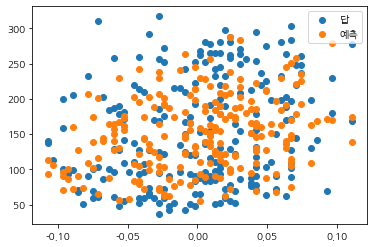

In [24]:
plt.scatter(X_test[:, 0], y_test, label="답")
plt.scatter(X_test[:, 0], prediction, label="예측")
plt.legend()
plt.show()

몇개 빼고는 근접한것을 알수있다.

In [27]:
sns.lineplot(x=X_test[:, 0], y_test)

SyntaxError: positional argument follows keyword argument (3538896961.py, line 1)

# 회고

###  솔직히 어려웠다. 맨 마지막에 라이브러리로는 단 한번에 해내는 것을 보고, 모델을 만들고 직접적으로 코드를 짜는것보다 라이브러리로 하는게 오히려 더 시간적으로, 절감할수 있겠다는 생각이 강하게 들었다.
* ndarray 또한 array 배열의 타입인것을 확인했다.

* 여러 실험을 해보았는데, 시각화에 대한 공부가 더욱 필요하다는것을 느꼇다.
